In [1]:
import pandas as pd

In [2]:
# loading the dataset and displaying the first rows to check if it is loaded
df = pd.read_csv('/kaggle/input/dataset-sfs/dataset-sfs.csv')
df.head()

,Phone Brand,Phone Model,Date Received,Date Ready,Phone Problem
0,Samsung,Galaxy S10,2022-05-15,2022-05-20,LCD Replacement
1,iPhone,12 Pro Max,2022-06-10,2022-06-15,Battery Replacement
2,Google,Pixel 5,2022-07-01,2022-07-05,Charging Port Repair
3,Huawei,P40,2022-08-02,2022-08-07,Battery Replacement
4,OnePlus,9T,2022-09-05,2022-09-10,Camera Repair


In [3]:
# check for missing values
df.isnull().sum()

Phone Brand      0
Phone Model      0
Date Received    0
Date Ready       0
Phone Problem    0
dtype: int64

In [4]:
# one-hot encoding on categorical variables 
df = pd.get_dummies(df, columns=['Phone Brand', 'Phone Model', 'Phone Problem'])

In [5]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Model_Y9 Prime 2019,Phone Model_Y9s,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
# Convert 'Date Received' to datetime format
df['Date Received'] = pd.to_datetime(df['Date Received'])

# Extract additional features from 'Date Received'
df['Month Received'] = df['Date Received'].dt.month
df['Day of Week Received'] = df['Date Received'].dt.dayofweek


In [7]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,5,6
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,6,4
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,7,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,8,1
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,9,0


In [8]:
# Convert 'Date Ready' to datetime format
df['Date Ready'] = pd.to_datetime(df['Date Ready'])

# Calculate the repair duration in days
df['Repair Duration'] = (df['Date Ready'] - df['Date Received']).dt.days

In [9]:
df.head(100)

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,5,6,5
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,6,4,5
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,7,4,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,1,5
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-12-25,2022-12-27,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,12,6,2
96,2022-12-27,2022-12-29,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,12,1,2
97,2022-12-29,2022-12-31,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,12,3,2
98,2022-12-31,2023-01-02,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,12,5,2


In [10]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,5,6,5
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,6,4,5
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,7,4,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,1,5
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,9,0,5


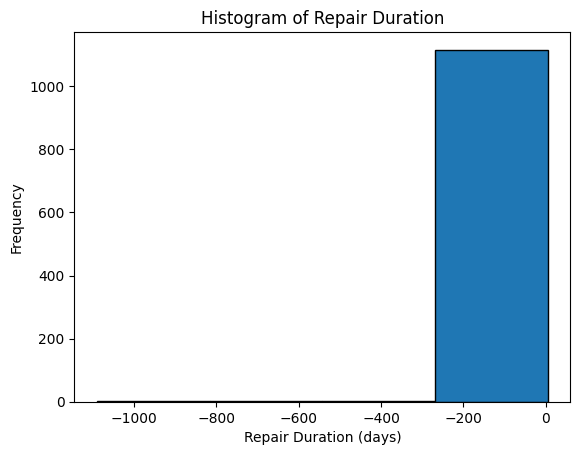

In [11]:
import matplotlib.pyplot as plt
plt.hist(df['Repair Duration'], bins=4, edgecolor='black')
plt.title('Histogram of Repair Duration')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [12]:
negative_durations = df[df['Repair Duration'] < 0]
print(negative_durations)

    Date Received Date Ready  Phone Brand_Google  Phone Brand_Huawei  \
49     2023-03-10 2022-03-15               False               False   
87     2024-01-06 2023-10-05               False               False   
308    2023-04-24 2022-04-29               False               False   
370    2023-04-24 2021-04-29               False               False   
493    2023-12-30 2021-01-04               False               False   
566    2023-12-30 2021-01-04               False               False   
601    2023-04-24 2021-04-29               False               False   
663    2023-12-27 2023-12-01               False               False   
669    2023-12-27 2023-12-01                True               False   
681    2023-12-28 2023-12-02               False               False   
687    2023-12-29 2023-12-03               False               False   
693    2023-12-28 2023-12-01               False               False   
699    2023-12-27 2023-12-01               False                

In [13]:
df = df[df['Repair Duration'] >= 0]

In [14]:
mask = df['Repair Duration'] < 0
df.loc[mask, ['Date Received', 'Date Ready']] = df.loc[mask, ['Date Ready', 'Date Received']].values

In [15]:
df['Repair Duration'] = (df['Date Ready'] - df['Date Received']).dt.days

In [16]:
negative_durations = df[df['Repair Duration'] < 0]
print(negative_durations)

Empty DataFrame
Columns: [Date Received, Date Ready, Phone Brand_Google, Phone Brand_Huawei, Phone Brand_OnePlus, Phone Brand_Oppo, Phone Brand_Samsung, Phone Brand_Xiaomi, Phone Brand_iPhone, Phone Model_10, Phone Model_11, Phone Model_11 Pro, Phone Model_12, Phone Model_12 Mini, Phone Model_12 Pro, Phone Model_12 Pro Max, Phone Model_13, Phone Model_13 Mini, Phone Model_13 Pro, Phone Model_14, Phone Model_15, Phone Model_16, Phone Model_17, Phone Model_18, Phone Model_19, Phone Model_2, Phone Model_20, Phone Model_21, Phone Model_22, Phone Model_23, Phone Model_24, Phone Model_3T, Phone Model_5T, Phone Model_6, Phone Model_6T, Phone Model_6s, Phone Model_7, Phone Model_7 Pro, Phone Model_7T, Phone Model_7T Pro, Phone Model_8, Phone Model_8 Pro, Phone Model_8T, Phone Model_9, Phone Model_9 Pro, Phone Model_9T, Phone Model_Black Shark 2, Phone Model_Black Shark 3, Phone Model_F1, Phone Model_Find X10, Phone Model_Find X11, Phone Model_Find X2, Phone Model_Find X2 Lite, Phone Model_Find

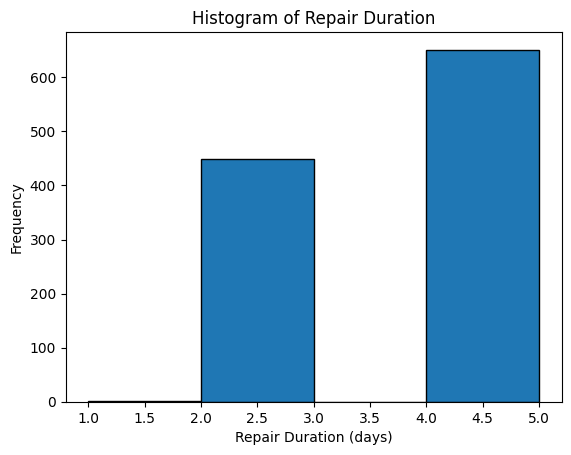

In [17]:
plt.hist(df['Repair Duration'], bins=4, edgecolor='black')
plt.title('Histogram of Repair Duration')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.show()